In [2]:
import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [ ]:
!wget https://raw.githubusercontent.com/EleonoraAiello/AIM23-24/main/dataT1DEXIstudyVideo_sedentary.csv

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/EleonoraAiello/AIM23-24/blob/main/DataAnalysis.ipynb)

# CSV File import 

In [4]:
#Let's load the T1DEXI dataset and covert the dataset into a 'Data Frame', 
#which is an easier to read and use table format for storing data:
dataTable = pd.read_csv("dataT1DEXIstudyVideo_sedentary.csv")

#Everything that is  held in the dataset variable can be viewed by using the print command. 
print(dataTable)

# The head and tail command will show us the first or last 5 instance and all the associated attributes
dataTable.head()


      Minimum_HR  Maximum_HR  Average_HR  Delta_HR  Standard_Dev_SC  \
0           74.0       142.0  107.275362      11.0         7.861639   
1           60.0       136.0  103.466165      16.0         8.618894   
2           80.0       124.0  103.007143      18.0         7.867961   
3           68.0       139.0  107.043956      12.0         9.106513   
4           61.0       133.0   96.032895     -29.0         8.639869   
...          ...         ...         ...       ...              ...   
3566        38.0       129.0   68.220370      37.0         3.973430   
3567        50.0       118.0   70.360444      43.0         3.334709   
3568        52.0       124.0   78.439926     -17.0         4.882319   
3569        54.0       133.0   85.588889      -8.0         5.007255   
3570        56.0       126.0   81.124304     -49.0         5.554537   

      Maximum_SC  Average_SC       Sum_SC   Activity  Sedentary  \
0      25.523438    4.497127   620.603515   Interval          0   
1      29.583

,Minimum_HR,Maximum_HR,Average_HR,Delta_HR,Standard_Dev_SC,Maximum_SC,Average_SC,Sum_SC,Activity,Sedentary,ActivityCategorical
0,74.0,142.0,107.275362,11.0,7.861639,25.523438,4.497127,620.603515,Interval,0,2
1,60.0,136.0,103.466165,16.0,8.618894,29.583984,6.355175,845.238281,Interval,0,2
2,80.0,124.0,103.007143,18.0,7.867961,29.531250,4.551911,637.267578,Interval,0,2
3,68.0,139.0,107.043956,12.0,9.106513,26.539062,9.084233,1644.246094,Aerobic,0,1
4,61.0,133.0,96.032895,-29.0,8.639869,27.263672,8.162148,1240.646484,Aerobic,0,1


# Preprocess

In [6]:
#check if any nan values are present
check_nan_in_dataTable = dataTable.isnull().values.any()
print(check_nan_in_dataTable)

#if check_nan_in_df is true, remove the nan values with dropna()
clean_dataTable = dataTable.dropna()


True


# Scatter plot with different color for sedentary/exercise

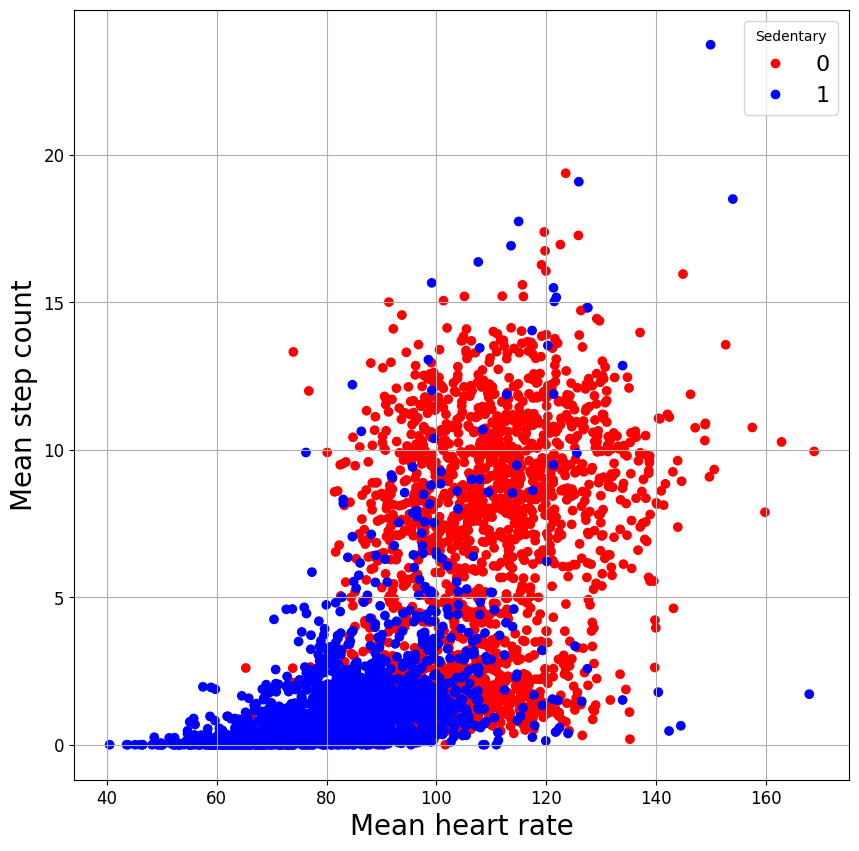

In [9]:
fig, ax = plt.subplots(figsize=[10,10])  #This creates an empty figure of size 10 by 10 inches

#For example we can create a scatter plot of mean hear rate on the x axis and mean step counts on the y axis, 
#and color coded by sedentary
colours = ListedColormap(['r','b'])
scatter = ax.scatter(clean_dataTable['Average_HR'], clean_dataTable['Average_SC'], c=clean_dataTable['Sedentary'],cmap=colours)
plt.xlabel('Mean heart rate', fontsize=20)
plt.ylabel('Mean step count', fontsize=20)
plt.legend(*scatter.legend_elements(),title="Sedentary",fontsize=16)
ax.yaxis.set_tick_params(labelsize='large')
ax.xaxis.set_tick_params(labelsize='large')
# Note that a label of 0 is exercise and 1 is sedentary
plt.grid()
plt.show()

# Boxplot for sedentary/exercise

The mean HR across population during exercise is:  108.87373013510005
The mean HR across population during sedentary is:  83.19178540976309


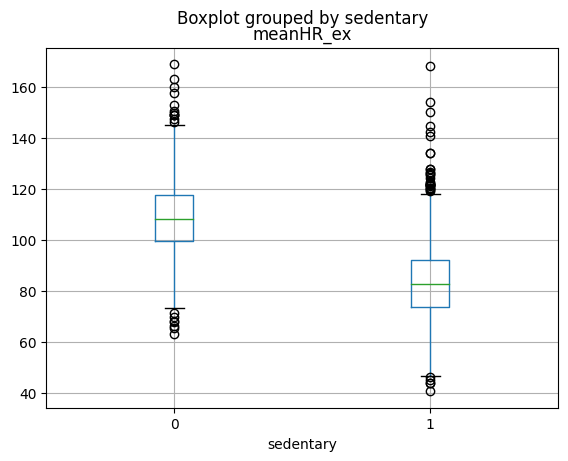

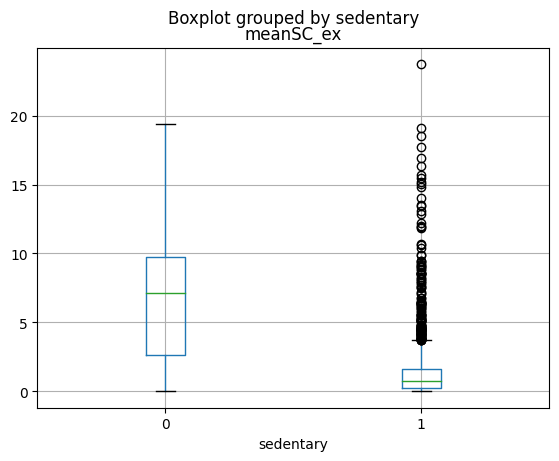

In [21]:

mean_heart_rate_exercise_population = np.mean(clean_dataTable.loc[clean_dataTable['Sedentary']==0]['Average_HR'])  
#This selects only cases with activity data (with sedentary label equal to 0)
print('The mean HR across population during exercise is: ', mean_heart_rate_exercise_population)

mean_heart_rate_sedentary_population = np.mean(clean_dataTable.loc[clean_dataTable['Sedentary']==1]['Average_HR']) 
#This selects only cases with sedentary data (with sedenatary label equal to 1)
print('The mean HR across population during sedentary is: ', mean_heart_rate_sedentary_population)


boxplotHR = clean_dataTable.boxplot(column=['Average_HR'], by='Sedentary', return_type='axes')
boxplotSC = clean_dataTable.boxplot(column=['Average_SC'], by='Sedentary', return_type='axes')
#plt.ylim([-20, 20])



# Correlation Analysis

In [28]:
exerciseData_sedentaryClassifier=clean_dataTable.loc[:,['Minimum_HR','Maximum_HR','Average_HR',
                                                       'Delta_HR','Standard_Dev_SC','Maximum_SC',
                                                       'Average_SC','Sum_SC','Sedentary']]

corr_matrix = exerciseData_sedentaryClassifier.corr()
print(corr_matrix)


            minHR_ex  maxHR_ex  meanHR_ex  deltaHR_ex  stdSC_ex  maxSC_ex  \
minHR_ex    1.000000  0.406557   0.679251    0.138805  0.383406  0.279481   
maxHR_ex    0.406557  1.000000   0.820664    0.199395  0.570844  0.525446   
meanHR_ex   0.679251  0.820664   1.000000    0.223921  0.666419  0.543390   
deltaHR_ex  0.138805  0.199395   0.223921    1.000000  0.225425  0.188528   
stdSC_ex    0.383406  0.570844   0.666419    0.225425  1.000000  0.794853   
maxSC_ex    0.279481  0.525446   0.543390    0.188528  0.794853  1.000000   
meanSC_ex   0.389546  0.484883   0.611955    0.248592  0.868941  0.664047   
deltaSC_ex  0.132575  0.421935   0.405035    0.103098  0.674384  0.498046   
sedentary  -0.502213 -0.429282  -0.672828   -0.236063 -0.664977 -0.466182   

            meanSC_ex  deltaSC_ex  sedentary  
minHR_ex     0.389546    0.132575  -0.502213  
maxHR_ex     0.484883    0.421935  -0.429282  
meanHR_ex    0.611955    0.405035  -0.672828  
deltaHR_ex   0.248592    0.103098  -0.236

# Heat Map

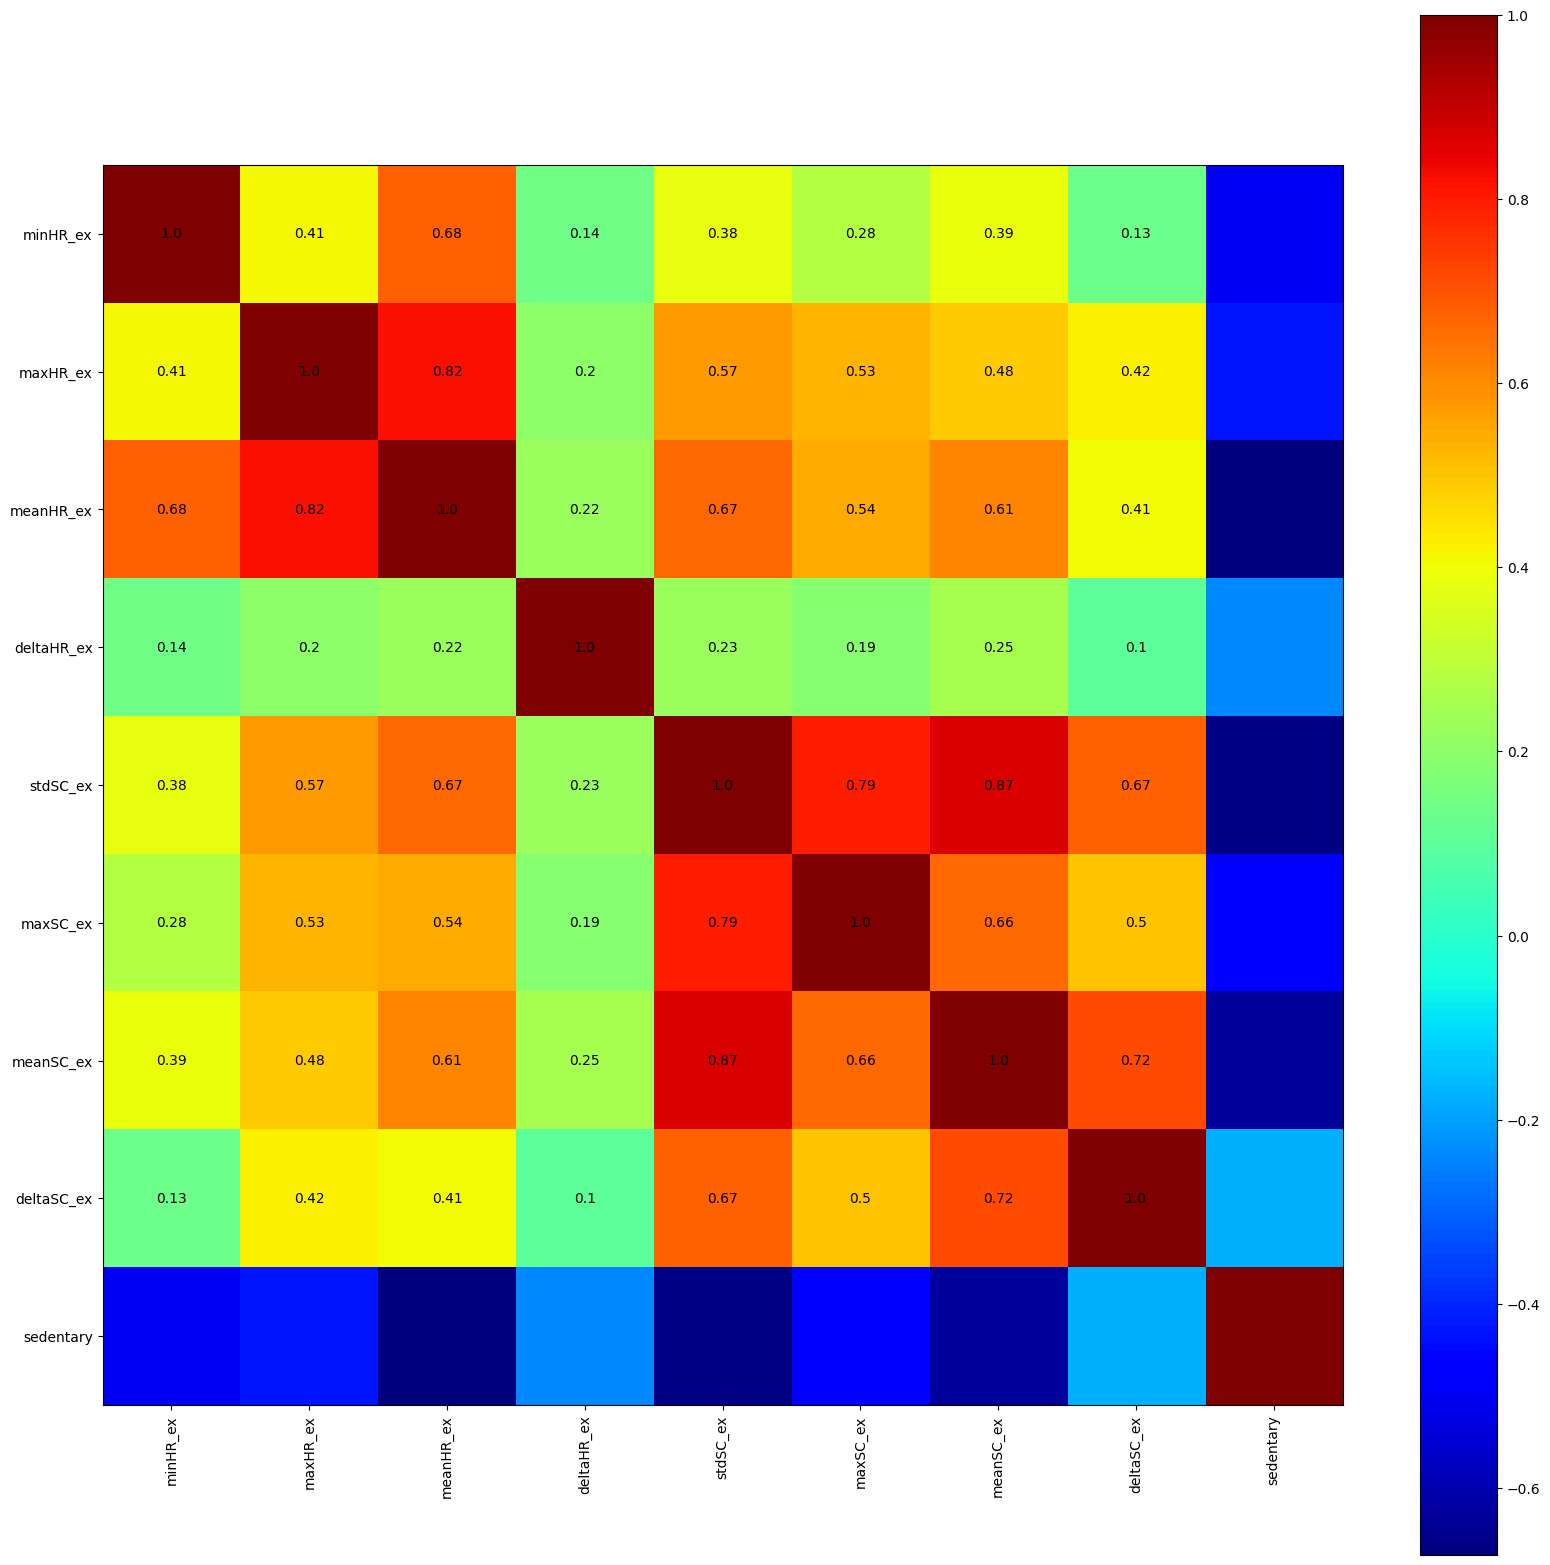

In [36]:
fig, ax = plt.subplots(figsize=[20,20])
im = ax.imshow(corr_matrix, cmap='jet')
ax.set_xticks(np.arange(len(corr_matrix)))
ax.set_yticks(np.arange(len(corr_matrix)))
ax.set_xticklabels(exerciseData_sedentaryClassifier.columns)
ax.set_yticklabels(exerciseData_sedentaryClassifier.columns)
plt.xticks(rotation='vertical')
for i in range(len(exerciseData_sedentaryClassifier.columns)-1):
    for j in range(len(exerciseData_sedentaryClassifier.columns)-1):
        text = ax.text(j, i, round(corr_matrix.to_numpy()[i, j], 2),
                       ha="center", va="center", color="black")

plt.colorbar(im)

# Scatter Matrix

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


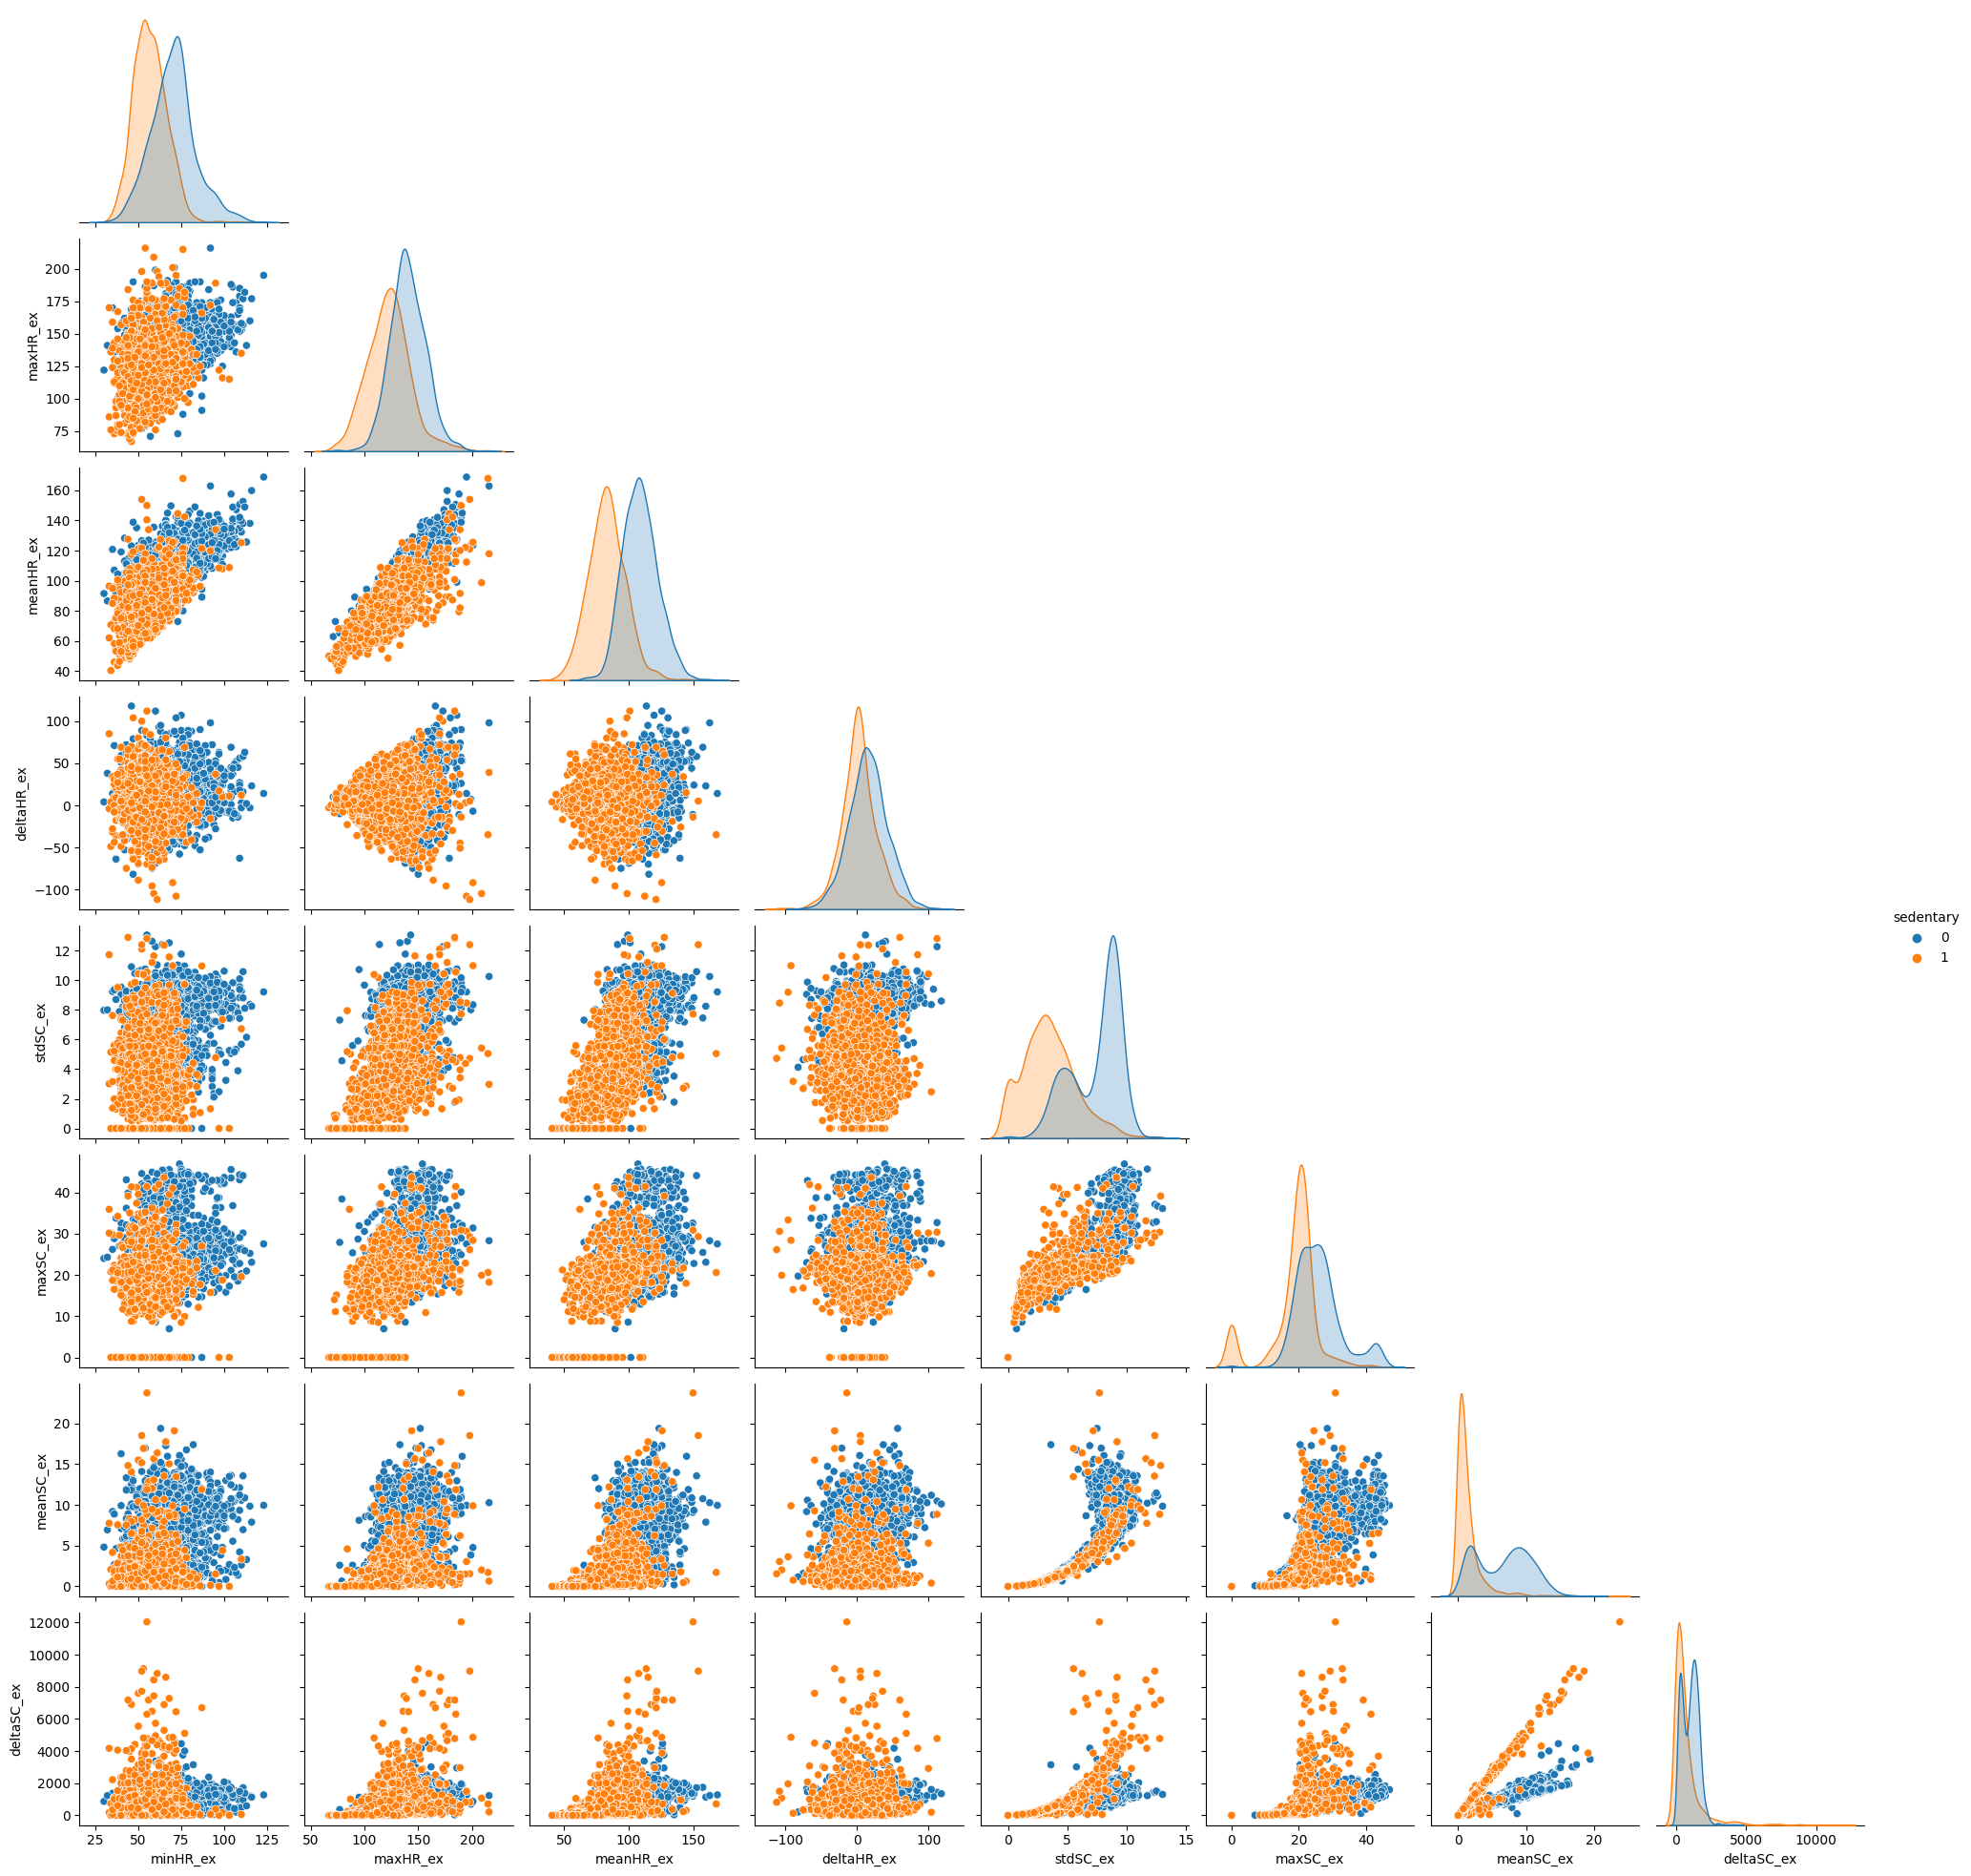

In [35]:
sns.pairplot(exerciseData_sedentaryClassifier, hue="Sedentary",corner=True)
plt.show()